In [9]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [11]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df1=df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


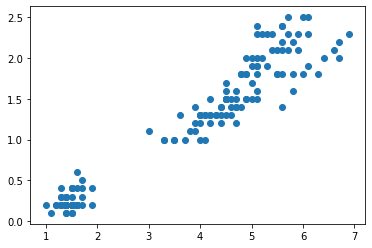

In [44]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])


In [46]:
df1.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [45]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
df1['cluster']=y_predicted
df1.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Text(0, 0.5, 'petal length (cm)')

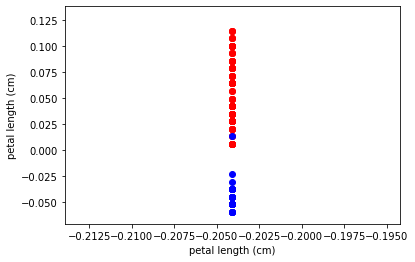

In [122]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="red")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.xlabel("petal length (cm)")
plt.ylabel("petal length (cm)")

In [91]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df1[['petal length (cm)']]=scaler.transform(df1[['petal length (cm)']])
df1.head()

,petal length (cm),petal width (cm),cluster
0,-0.204081,0.2,1
1,-0.204081,0.2,1
2,-0.204081,0.2,1
3,-0.204080,0.2,1
4,-0.204081,0.2,1


In [100]:
scaler.fit(df[['petal width (cm)']])
df1['petal width (cm)']=scaler.transform(df1[['petal width (cm)']])
df1

,petal length (cm),petal width (cm),cluster
0,-0.204081,-0.051794,1
1,-0.204081,-0.051794,1
2,-0.204081,-0.051794,1
3,-0.204080,-0.051794,1
4,-0.204081,-0.051794,1
5,-0.204080,-0.037326,1
6,-0.204081,-0.044560,1
7,-0.204080,-0.051794,1
8,-0.204081,-0.051794,1
9,-0.204080,-0.059028,1


In [105]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
y_predicted=km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
df1['cluster']=y_predicted
df1

,petal length (cm),petal width (cm),cluster
0,-0.204081,-0.051794,1
1,-0.204081,-0.051794,1
2,-0.204081,-0.051794,1
3,-0.204080,-0.051794,1
4,-0.204081,-0.051794,1
5,-0.204080,-0.037326,1
6,-0.204081,-0.044560,1
7,-0.204080,-0.051794,1
8,-0.204081,-0.051794,1
9,-0.204080,-0.059028,1


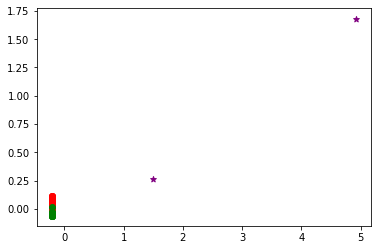

In [143]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [144]:
df1.columns

Index(['petal length (cm)', 'petal width (cm)', 'cluster'], dtype='object')

In [150]:
kreg=range(1,10)
see=[]
for k in kreg:
    km=KMeans(n_clusters=k)
    km.fit(df1[['petal length (cm)','petal width (cm)']])
    see.append(km.inertia_)

In [152]:
see

[0.4530014926323893,
 0.09631770468143924,
 0.025709564888209545,
 0.01445111601421637,
 0.008804875536546521,
 0.006801024947301488,
 0.004752114200965505,
 0.0030202470127205982,
 0.002415190939778333]

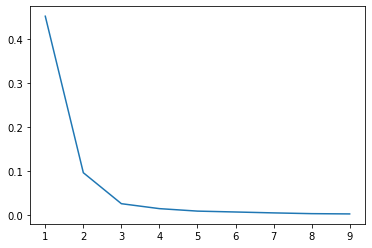

In [154]:
plt.plot(kreg,see)